## Computer_Vision && Deeplearning Project



#   Facial Emotion Recognition  Using CNN



In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/fer2013/

/content/drive/MyDrive/fer2013


In [3]:
import os 
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
df = pd.read_csv('fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


# Data Sampling and Pre-Processing

***No_of Unique Emotion***

In [5]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [6]:
train_set = df[(df.Usage == 'Training')]
validation_set = df[(df.Usage == 'PublicTest')]
test_set = df[(df.Usage == 'PrivateTest')]

In [7]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 
num_class = len(label_to_text)

In [8]:
label_to_text

{0: 'anger',
 1: 'disgust',
 2: 'fear',
 3: 'happiness',
 4: 'sadness',
 5: 'surprise',
 6: 'neutral'}

In [9]:
print('Samples per emotion:')
print(df.emotion.value_counts())

Samples per emotion:
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


In [10]:
np.array(df.pixels.loc[0].split(' ')).reshape(48,48)

array([['70', '80', '82', ..., '52', '43', '41'],
       ['65', '61', '58', ..., '56', '52', '44'],
       ['50', '43', '54', ..., '49', '56', '47'],
       ...,
       ['91', '65', '42', ..., '72', '56', '43'],
       ['77', '82', '79', ..., '105', '70', '46'],
       ['77', '72', '84', ..., '106', '109', '82']], dtype='<U3')

In [11]:
from math import sqrt
depth = 1
height = int(sqrt(len(df.pixels[0].split())))
width = height

In [12]:
df = train_set.values
pixels = df[:, 1]
X_train = np.zeros((train_set.shape[0], 48*48))
for ix in range(X_train.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X_train.shape[1]):
        X_train[ix, iy] = int(p[iy])

df = validation_set.values
pixels = df[:, 1]
X_validation = np.zeros((validation_set.shape[0], 48*48))
for ix in range(X_validation.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X_validation.shape[1]):
        X_validation[ix, iy] = int(p[iy])

df = test_set.values
pixels = df[:, 1]
X_test = np.zeros((test_set.shape[0], 48*48))
for ix in range(X_test.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X_test.shape[1]):
        X_test[ix, iy] = int(p[iy])

In [13]:
print(np.array(validation_set.emotion))

[0 1 4 ... 4 4 4]


neutral


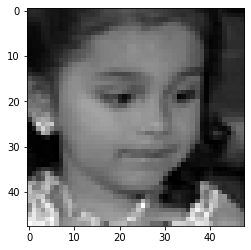

In [14]:
sample_number = 322
import numpy as np
import scipy.misc
img = np.mat(X_test[sample_number]).reshape(48,48)
plt.imshow(img,cmap='gray')
print(label_to_text[np.array(test_set.emotion)[sample_number]])

To form our input for the neural network, we defined image above and reshape them to (48x48x1) numpy arrays



In [15]:
num_train = X_train.shape[0]
num_validation = X_validation.shape[0]
num_test = X_test.shape[0]

X_train = X_train.reshape(num_train, width, height, depth)
X_validation = X_validation.reshape(num_test, width, height, depth)
X_test = X_test.reshape(num_test, width, height, depth)

print('Training: ',X_train.shape)
print('Validation: ',X_validation.shape)
print('Test: ',X_test.shape)

Training:  (28709, 48, 48, 1)
Validation:  (3589, 48, 48, 1)
Test:  (3589, 48, 48, 1)


In [16]:
from keras.utils import np_utils

y_train = train_set.emotion
y_train = np_utils.to_categorical(y_train, num_class)

y_validation = validation_set.emotion
y_validation = np_utils.to_categorical(y_validation, num_class)

y_test = test_set.emotion
y_test = np_utils.to_categorical(y_test, num_class)

print('Training: ',y_train.shape)
print('Validation: ',y_validation.shape)
print('Test: ',y_test.shape)

Training:  (28709, 7)
Validation:  (3589, 7)
Test:  (3589, 7)


# Model Architecture


In [17]:
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.models import Sequential

model = Sequential()

model.add(Convolution2D(64, (3, 1), padding='same', input_shape=(48,48,1)))
model.add(Convolution2D(64, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 1), padding='same'))
model.add(Convolution2D(128, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, (3, 1), padding='same'))
model.add(Convolution2D(256, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(512, (3, 1), padding='same'))
model.add(Convolution2D(512, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7))
model.add(Activation('softmax'))


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        256       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        12352     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0

In [18]:
from keras.preprocessing.image import ImageDataGenerator 

datagen = ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    rotation_range=0, 
    width_shift_range=0.0,
    height_shift_range=0.0, 
    horizontal_flip=True,  
    vertical_flip=False, 
    )


datagen.fit(X_train)
datagen.fit(X_validation)

In [19]:
batch_size = 128
num_epochs = 40

In [22]:
file_name = 'our_model.h5'
face_path= os.path.join('facial_emotion_detection',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=face_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [23]:
model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate = .0005),
                 loss = 'CategoricalCrossentropy',
                 metrics = ['accuracy'])

In [24]:
validation_flow = datagen.flow(X_validation, y_validation)
train_flow = datagen.flow(X_train,y_train)

In [25]:
history = model.fit_generator(train_flow,
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_data=validation_flow, 
                    callbacks= call_back)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


896/898 [============================>.] - ETA: 0s - loss: 1.6995 - accuracy: 0.3525
Epoch 1: val_accuracy improved from -inf to 0.37503, saving model to facial_emotion_detection/our_model.h5
898/898 [==============================] - 29s 24ms/step - loss: 1.6996 - accuracy: 0.3524 - val_loss: 1.7594 - val_accuracy: 0.3750
Epoch 2/40
898/898 [==============================] - ETA: 0s - loss: 1.3948 - accuracy: 0.4652
Epoch 2: val_accuracy improved from 0.37503 to 0.47701, saving model to facial_emotion_detection/our_model.h5
898/898 [==============================] - 22s 24ms/step - loss: 1.3948 - accuracy: 0.4652 - val_loss: 1.3554 - val_accuracy: 0.4770
Epoch 3/40
898/898 [==============================] - ETA: 0s - loss: 1.2904 - accuracy: 0.5091
Epoch 3: val_accuracy improved from 0.47701 to 0.52828, saving model to facial_emotion_detection/our_model.h5
898/898 [==============================] - 22s 24ms/step - loss: 1.2904 - accuracy: 0.5091 - val_loss: 1.2374 - val_accuracy: 0.52

In [26]:
import os
try:
   os.mkdir('facial_emotion')
except:
       pass

In [27]:
file_name = 'our_model.h5'
face_path= os.path.join('facial_emotion_detection',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=face_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


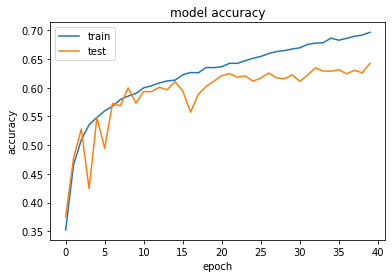

In [28]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


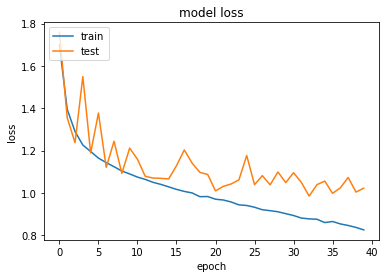

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()